<a href="https://colab.research.google.com/github/crissyro/4-sem-university/blob/main/system_modeling/sys_mod_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import re
import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns', None)

In [28]:
df = pd.read_csv('data_experiment.csv')
df.drop(['Отметка времени'], axis=1, inplace=True)
print(df.shape)
df.head()

(221, 18)


,Уровень обучения,Направление,Пол,Возраст,"Оцени, насколько часто ты прокрастинируешь в учебе",Насколько прокрастинация мешает тебе учиться?,"Тревожность и стресс: Я избегаю задач, потому что чувствую тревогу или стресс от них.","Мотивация: Я прокрастинирую, когда не вижу смысла в задании.",Наличие дедлайна: Я работаю только когда приближается дедлайн.,Сон: Недостаток сна снижает мою продуктивность и усиливает прокрастинацию.,"Социальные сети: Я часто откладываю дела, уходя в соцсети.",Кофеин: Кофе/энергетики помогают мне начать работу.,Рабочая среда: Мне сложно сосредоточиться в общежитии/доме/кафе и т.д.,"Самооценка: Я прокрастинирую, потому что боюсь сделать плохо.","Усталость: Я слишком устаю, чтобы начать делать задания.",Как часто ты используешь “cramming” (делаешь всё в последний момент)?,Что ты чаще откладываешь?,"Опиши одной фразой, почему ты прокрастинируешь чаще всего"
0,Бакалаврит/Специалитет,Архитектура,Мужской,21,4,3,5,2,3,1,3,1,3,2,5,Иногда,"Повседневные домашки, Курсовые/доклады",Физическое истощение
1,Магистратура,Медицина,Мужской,22,4,5,3,4,5,2,5,2,5,2,5,Всегда,"Курсовые/доклады, Подготовку к экзаменам",Нет внешнего контроля
2,Бакалаврит/Специалитет,Архитектура,Женский,19,4,5,5,5,5,5,2,2,4,3,5,Иногда,Курсовые/доклады,Осознанное откладывание
3,Магистратура,Архитектура,Мужской,23,3,3,5,4,1,4,2,2,1,3,5,Часто,Курсовые/доклады,Лень
4,Магистратура,Архитектура,Женский,22,5,5,5,1,3,1,3,1,3,4,5,Иногда,Повседневные домашки,Любая задача кажется неподъемной


In [30]:
column_mapping = {
    'Уровень обучения': 'education_level',
    'Направление': 'major',
    'Пол': 'gender',
    'Возраст': 'age',
    'Оцени, насколько часто ты прокрастинируешь в учебе': 'procrastination_freq',
    'Насколько прокрастинация мешает тебе учиться?': 'procrastination_impact',
    'Тревожность и стресс: Я избегаю задач, потому что чувствую тревогу или стресс от них.': 'anxiety_stress',
    'Мотивация: Я прокрастинирую, когда не вижу смысла в задании.': 'motivation',
    'Наличие дедлайна: Я работаю только когда приближается дедлайн.': 'deadline_dependency',
    'Сон: Недостаток сна снижает мою продуктивность и усиливает прокрастинацию.': 'sleep_impact',
    'Социальные сети: Я часто откладываю дела, уходя в соцсети.': 'social_media',
    'Кофеин: Кофе/энергетики помогают мне начать работу.': 'caffeine',
    'Рабочая среда: Мне сложно сосредоточиться в общежитии/доме/кафе и т.д.': 'environment',
    'Самооценка: Я прокрастинирую, потому что боюсь сделать плохо.': 'self_esteem',
    'Усталость: Я слишком устаю, чтобы начать делать задания.': 'fatigue',
    'Как часто ты используешь “cramming” (делаешь всё в последний момент)?': 'cramming_freq',
    'Что ты чаще откладываешь?': 'postponed_tasks',
    'Опиши одной фразой, почему ты прокрастинируешь чаще всего': 'procrastination_reason'
}

df = df.rename(columns=column_mapping)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   education_level         221 non-null    object
 1   major                   221 non-null    object
 2   gender                  221 non-null    object
 3   age                     221 non-null    int64 
 4   procrastination_freq    221 non-null    int64 
 5   procrastination_impact  221 non-null    int64 
 6   anxiety_stress          221 non-null    int64 
 7   motivation              221 non-null    int64 
 8   deadline_dependency     221 non-null    int64 
 9   sleep_impact            221 non-null    int64 
 10  social_media            221 non-null    int64 
 11  caffeine                221 non-null    int64 
 12  environment             221 non-null    int64 
 13  self_esteem             221 non-null    int64 
 14  fatigue                 221 non-null    int64 
 15  crammi

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,221.0,19.597285,2.599964,16.0,18.0,19.0,21.0,25.0
procrastination_freq,221.0,3.832579,1.046217,1.0,3.0,4.0,5.0,5.0
procrastination_impact,221.0,4.502262,0.760529,2.0,4.0,5.0,5.0,5.0
anxiety_stress,221.0,4.493213,0.742354,2.0,4.0,5.0,5.0,5.0
motivation,221.0,3.398190,1.302025,1.0,3.0,4.0,4.0,5.0
deadline_dependency,221.0,3.746606,1.065598,1.0,3.0,4.0,5.0,5.0
sleep_impact,221.0,2.873303,1.152966,1.0,2.0,3.0,4.0,5.0
social_media,221.0,3.656109,1.242915,1.0,3.0,4.0,5.0,5.0
caffeine,221.0,2.434389,1.070893,1.0,2.0,2.0,3.0,5.0
environment,221.0,3.497738,1.150590,1.0,3.0,4.0,4.0,5.0


In [33]:
df.describe(include='object').T

,count,unique,top,freq
education_level,221,3,Колледж,91
major,221,7,Архитектура,68
gender,221,2,Мужской,127
cramming_freq,221,4,Часто,103
postponed_tasks,221,7,Курсовые/доклады,60
procrastination_reason,221,75,Социальные сети вызывают зависимость,8


In [34]:
df.isnull().sum()

,0
education_level,0
major,0
gender,0
age,0
procrastination_freq,0
procrastination_impact,0
anxiety_stress,0
motivation,0
deadline_dependency,0
sleep_impact,0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


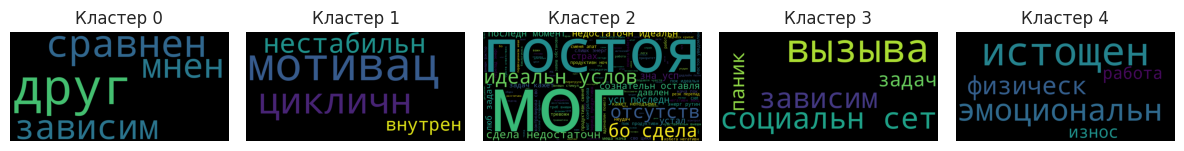


Результаты анализа:
                  procrastination_reason  reason_weight
0                   Физическое истощение       4.666667
1                  Нет внешнего контроля       4.475138
2                Осознанное откладывание       4.475138
3                                   Лень       4.475138
4       Любая задача кажется неподъемной       4.475138
..                                   ...            ...
216                 Завишу от обстановки       4.475138
217                  Цикличная мотивация       4.900000
218                        Страх неудачи       4.475138
219  Боюсь сделать недостаточно идеально       4.475138
220   Знаю, что успею в последний момент       4.475138

[221 rows x 2 columns]

Средний вес: 4.50


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
stop_words = stopwords.words('russian')
stemmer = SnowballStemmer('russian')

def preprocess_text(text):
    try:
        if pd.isna(text):
            return np.nan

        text = re.sub(r'[^а-яё\s]', '', str(text).lower())
        words = [stemmer.stem(w) for w in text.split()
                if w not in stop_words and len(w) > 2]

        return ' '.join(words) if words else np.nan
    except:
        return np.nan

def analyze_procrastination(df):
    df['reason_weight'] = np.nan

    required_cols = ['procrastination_reason', 'procrastination_impact']
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"Отсутствуют необходимые колонки: {required_cols}")

    df['cleaned_text'] = df['procrastination_reason'].apply(preprocess_text)
    valid_data = df.dropna(subset=['cleaned_text']).copy()

    if len(valid_data) >= 5:
        try:
            tfidf = TfidfVectorizer(
                max_features=200,
                ngram_range=(1, 2),
                min_df=2
            )
            X = tfidf.fit_transform(valid_data['cleaned_text'])

            n_clusters = max(2, min(5, len(valid_data)//5))
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            valid_data['cluster'] = kmeans.fit_predict(X)

            cluster_weights = valid_data.groupby('cluster')['procrastination_impact'].mean()
            valid_data['reason_weight'] = valid_data['cluster'].map(cluster_weights)

            df.loc[valid_data.index, 'reason_weight'] = valid_data['reason_weight']

            plt.figure(figsize=(12,6))
            sorted_clusters = sorted(valid_data['cluster'].unique())

            for i, cluster in enumerate(sorted_clusters):
                text = ' '.join(valid_data[valid_data['cluster'] == cluster]['cleaned_text'])
                wordcloud = WordCloud(width=800, height=400).generate(text)
                plt.subplot(1, len(sorted_clusters), i+1)
                plt.imshow(wordcloud)
                plt.axis('off')
                plt.title(f'Кластер {cluster}')
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Ошибка анализа: {str(e)}")

    mean_weight = df['procrastination_impact'].mean()
    df['reason_weight'] = df['reason_weight'].fillna(mean_weight)

    return df

result_df = analyze_procrastination(df)

print("\nРезультаты анализа:")
print(result_df[['procrastination_reason', 'reason_weight']])
print(f"\nСредний вес: {result_df['reason_weight'].mean():.2f}")

In [37]:
df


,education_level,major,gender,age,procrastination_freq,procrastination_impact,anxiety_stress,motivation,deadline_dependency,sleep_impact,social_media,caffeine,environment,self_esteem,fatigue,cramming_freq,postponed_tasks,procrastination_reason,reason_weight,cleaned_text
0,Бакалаврит/Специалитет,Архитектура,Мужской,21,4,3,5,2,3,1,3,1,3,2,5,Иногда,"Повседневные домашки, Курсовые/доклады",Физическое истощение,4.666667,физическ истощен
1,Магистратура,Медицина,Мужской,22,4,5,3,4,5,2,5,2,5,2,5,Всегда,"Курсовые/доклады, Подготовку к экзаменам",Нет внешнего контроля,4.475138,внешн контрол
2,Бакалаврит/Специалитет,Архитектура,Женский,19,4,5,5,5,5,5,2,2,4,3,5,Иногда,Курсовые/доклады,Осознанное откладывание,4.475138,осозна откладыван
3,Магистратура,Архитектура,Мужской,23,3,3,5,4,1,4,2,2,1,3,5,Часто,Курсовые/доклады,Лень,4.475138,лен
4,Магистратура,Архитектура,Женский,22,5,5,5,1,3,1,3,1,3,4,5,Иногда,Повседневные домашки,Любая задача кажется неподъемной,4.475138,люб задач кажет неподъемн
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Колледж,Инженерия,Женский,19,5,4,5,5,2,5,2,3,4,2,5,Часто,"Курсовые/доклады, Подготовку к экзаменам",Завишу от обстановки,4.475138,завиш обстановк
217,Магистратура,IT,Женский,25,4,5,4,5,4,3,2,4,3,2,5,Часто,Курсовые/доклады,Цикличная мотивация,4.900000,цикличн мотивац
218,Колледж,Психология,Женский,19,4,5,5,3,2,3,5,3,4,3,5,Иногда,"Повседневные домашки, Подготовку к экзаменам",Страх неудачи,4.475138,страх неудач
219,Колледж,Лингвистика,Женский,16,2,3,5,3,3,2,4,1,4,3,5,Всегда,Повседневные домашки,Боюсь сделать недостаточно идеально,4.475138,бо сдела недостаточн идеальн


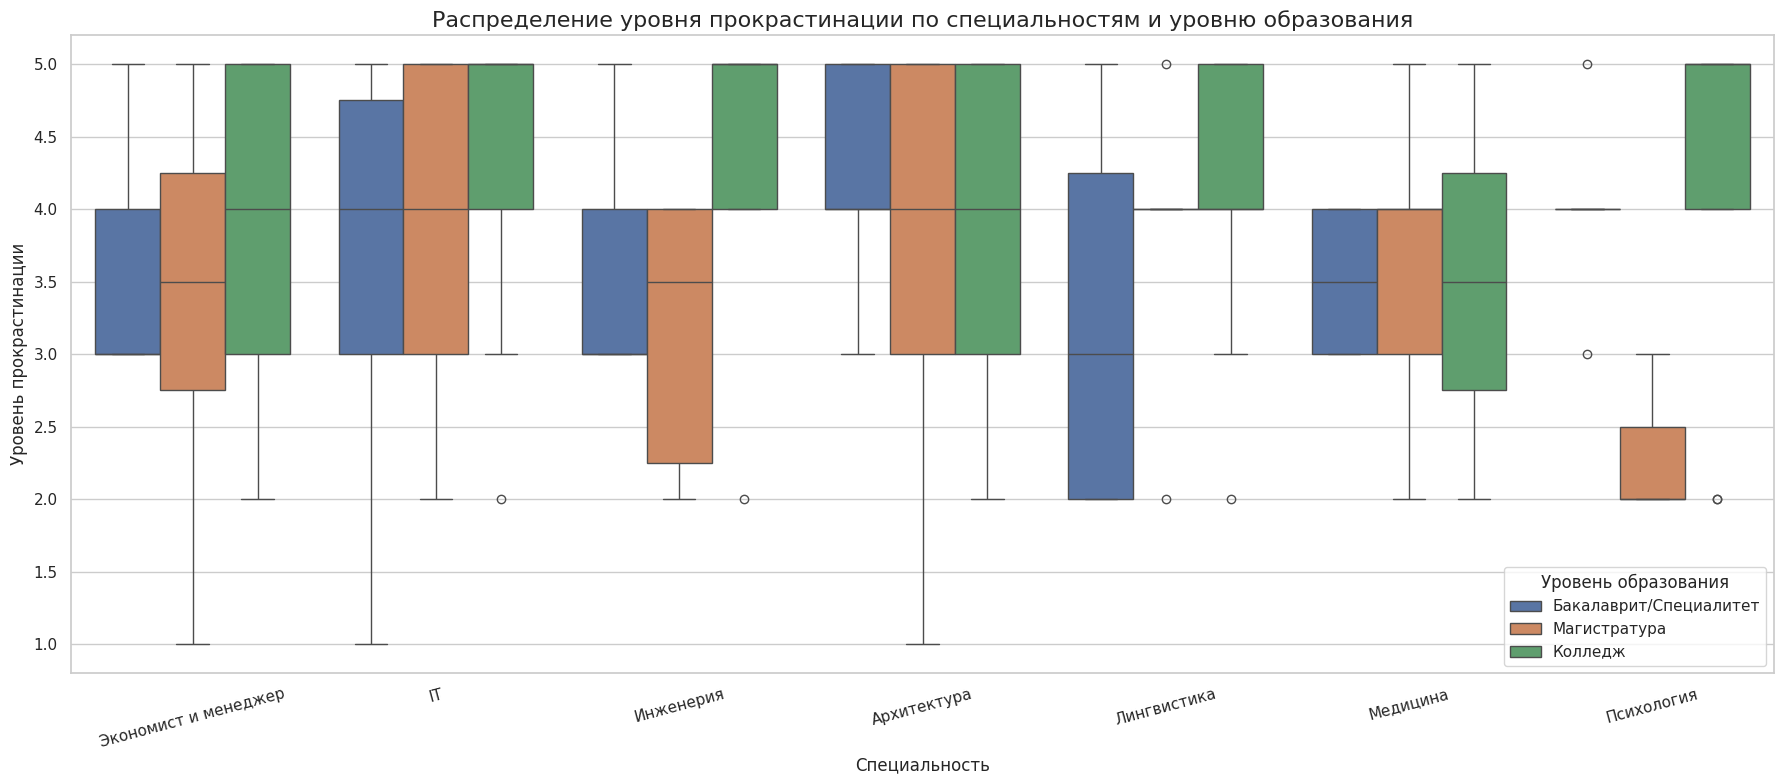

In [39]:
plt.figure(figsize=(18, 8))
sns.boxplot(
    x='major',
    y='procrastination_freq',
    data=df,
    hue='education_level',
    order=df.groupby('major')['procrastination_freq'].median().sort_values().index
)
plt.title('Распределение уровня прокрастинации по специальностям и уровню образования', fontsize=16)
plt.xticks(rotation=15)
plt.xlabel('Специальность')
plt.ylabel('Уровень прокрастинации')
plt.legend(title='Уровень образования')
plt.tight_layout()
plt.savefig('procrastination_by_major.png', dpi=300)
plt.show()

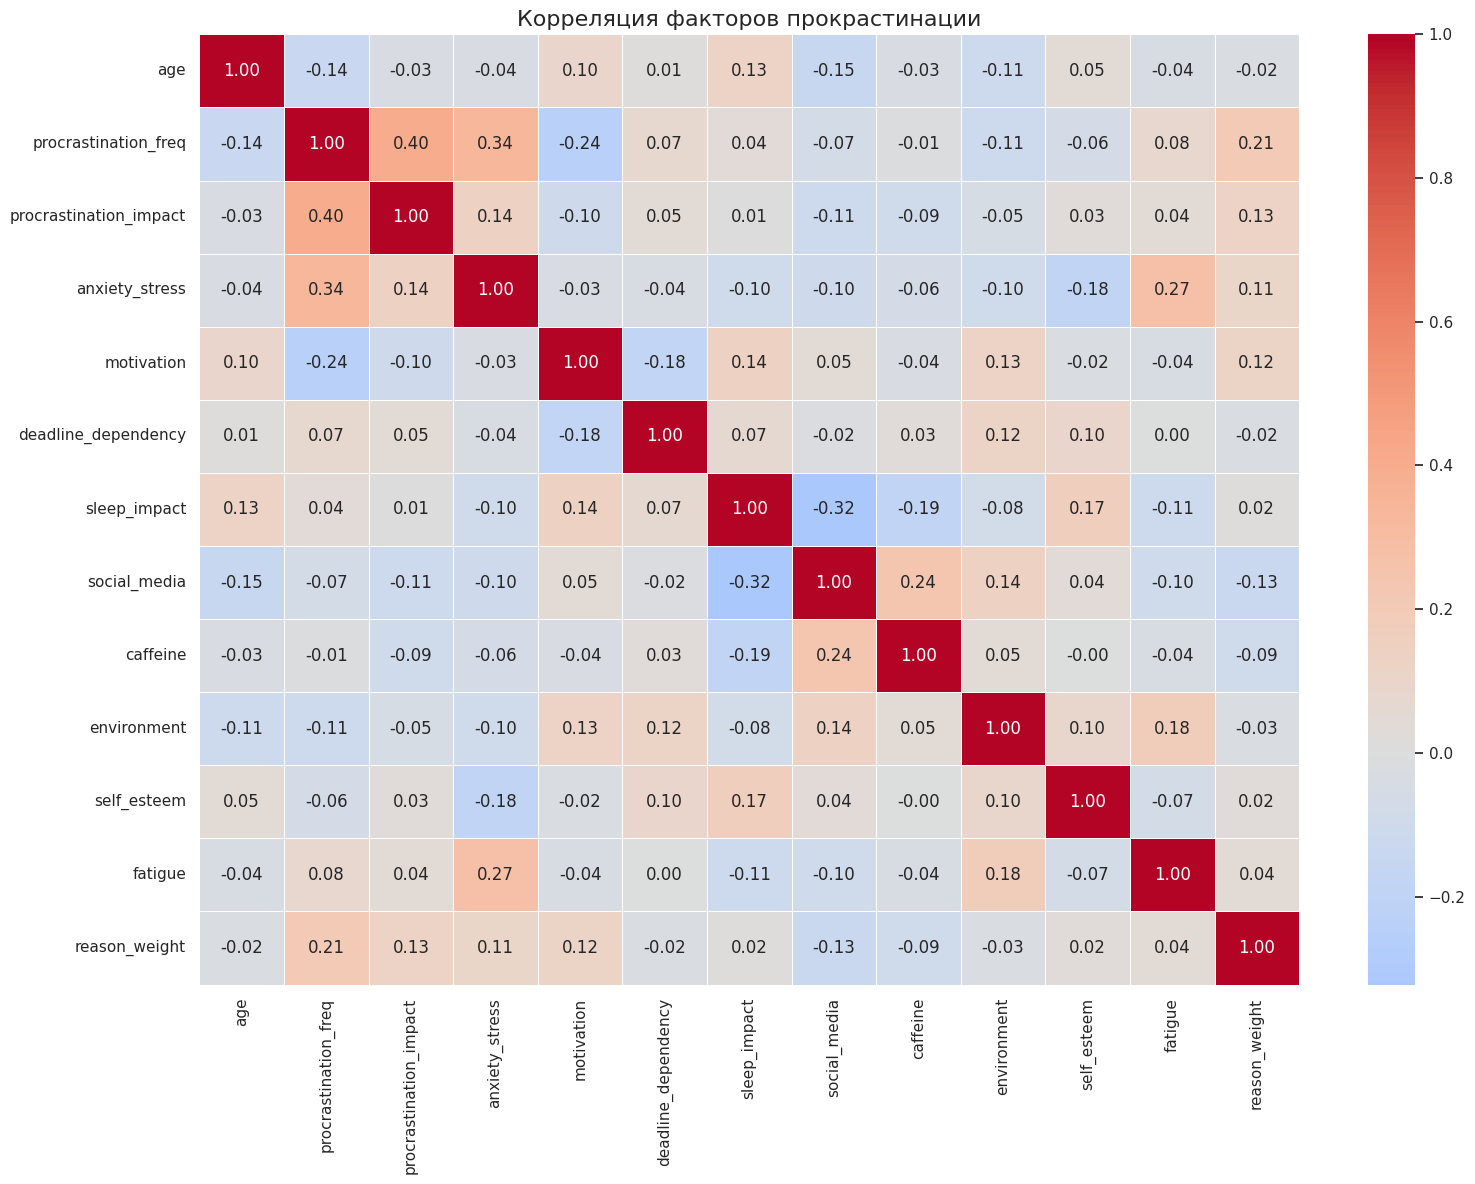

In [42]:
corr_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=.5
)
plt.title('Корреляция факторов прокрастинации', fontsize=16)
plt.tight_layout()
plt.show()

In [62]:
def plot_radar_chart(direction):
    profile_df = df[df['major'] == direction]

    if profile_df.empty:
        print(f"Нет данных для направления: {direction}")
        return

    profile_data = profile_df.mean(numeric_only=True)

    categories = [
        'procrastination_freq', 'procrastination_impact',
        'anxiety_stress', 'fatigue', 'social_media',
        'caffeine', 'sleep_impact'
    ]

    values = profile_data[categories].values.tolist()
    values += values[:1]

    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories + [categories[0]],
        fill='toself',
        name=direction,
        line=dict(color='royalblue', width=3),
        fillcolor='rgba(65, 105, 225, 0.4)'
    ))

    avg_values = df[categories].mean().values.tolist()
    avg_values += avg_values[:1]

    fig.add_trace(go.Scatterpolar(
        r=avg_values,
        theta=categories + [categories[0]],
        name='Средние значения',
        line=dict(color='gray', dash='dot', width=2),
        opacity=0.6
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 5],
            ),
            angularaxis=dict(
                tickfont=dict(size=12),
                gridcolor='lightgray'
            ),
        ),
        title=dict(
            text=f'Профиль прокрастинации: {direction}',
            x=0.5,
            font=dict(size=20, family='Arial')
        ),
        showlegend=True,
        height=600,
        width=800,
        paper_bgcolor='white',
        plot_bgcolor='white'
    )

    fig.show()

unique_majors = df['major'].unique()

for direction in unique_majors:
    plot_radar_chart(direction)